<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/RNN_on_a_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN on a Sine Wave

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
t = np.linspace(0, 50, 501)
y = np.sin(t)

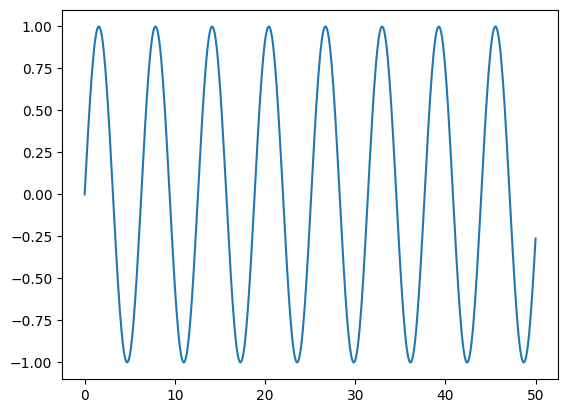

In [10]:
plt.plot(t, y)

In [11]:
df = pd.DataFrame(index=t, data=y, columns=['Sine'])

In [5]:
len(df)

501

##Train Test Split

In [12]:
test_percent = 0.1
test_point = np.round(len(df)* 0.1)

In [13]:
test_point

50.0

In [14]:
test_index = int(len(df)-test_point)

In [9]:
test_index

451

In [15]:
train_set = df.iloc[:test_index]
len(train_set)

451

In [16]:
test_set = df.iloc[test_index:]
len(train_set)

451

##Scale Train AND Test Set

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_set)

MinMaxScaler()

In [20]:
train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

##TimeseriesGenerator

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
length = 50     #n points we give the model             [0,1,2,3,4,5,6,7,8,9]
batch_size = 1  #n points we want the model to return                        [10]

In [25]:
generator = TimeseriesGenerator(data=train_set, targets=train_set,
                                length=length,batch_size=batch_size)

In [ ]:
#help(TimeseriesGenerator)

###understanding generator object

In [24]:
X, y = generator[0]

In [ ]:
X #we see that X's length is same as our length var

In [ ]:
y #we see that y's length is same as our batch_size var

In [ ]:
train_set[:length+batch_size] #here we can see the original data from our train_set

##Create and train the model

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [28]:
n_features = 1

In [ ]:
##help(SimpleRNN)

In [30]:
model = Sequential()

model.add(SimpleRNN(units=length, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit_generator(generator, epochs=5) #`Model.fit_generator` is deprecated

Epoch 1/5


<ipython-input-32-20ed1eb3145d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=5)


401/401 [==============================] - 5s 9ms/step - loss: 0.0082
Epoch 2/5
401/401 [==============================] - 3s 9ms/step - loss: 9.0355e-05
Epoch 3/5
401/401 [==============================] - 4s 11ms/step - loss: 1.2762e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 1.8787e-04
Epoch 5/5
401/401 [==============================] - 4s 11ms/step - loss: 8.4408e-05


In [33]:
losses = pd.DataFrame(model.history.history)

<Axes: >

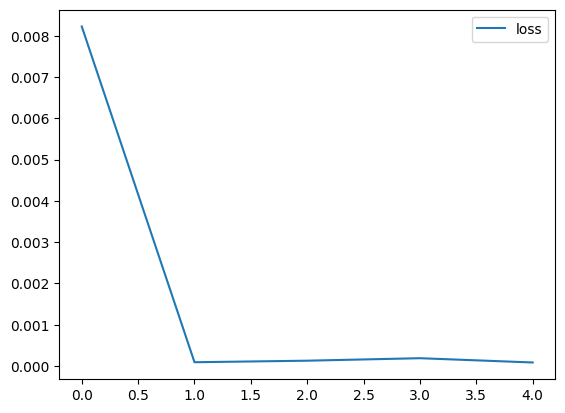

In [34]:
losses.plot()

##Predict

In [37]:
batch = train_set[-length:]
batch.shape

(50, 1)

In [39]:
batch = batch.reshape((1,length,n_features))
batch.shape

(1, 50, 1)

In [40]:
model.predict(batch)

1/1 [==============================] - 0s 285ms/step


array([[0.9482247]], dtype=float32)

In [43]:
test_set[0]

array([0.94955134])

##predict full test range

In [ ]:
test_preds = []

first_batch = train_set[-length:]
current_batch_reshaped = first_batch.reshape((1, length, n_features))

for i in range(len(test_set)):
  current_pred = model.predict(current_batch_reshaped)[0]
  test_preds.append(current_pred)
  current_batch_reshaped = np.append(current_batch_reshaped[:,1:,:], [[current_pred]], axis=1)

In [ ]:
test_preds

###Inverse Transform Scale

In [46]:
true_preds = scaler.inverse_transform(test_preds)

##plot test Vs preds

In [52]:
type(test_set)

pandas.core.frame.DataFrame

In [51]:
test_set = df.iloc[test_index:]

In [55]:
test_set.head()

,Sine,preds
45.1,0.899097,0.896444
45.2,0.938307,0.935347
45.3,0.968142,0.963468
45.4,0.988304,0.982076
45.5,0.998591,0.990069


In [54]:
test_set['preds'] = true_preds

<ipython-input-54-fc1653ac2713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['preds'] = true_preds


<Axes: >

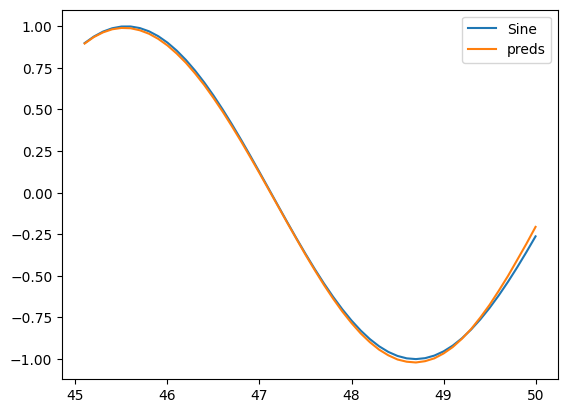

In [56]:
test_set.plot()